# Data Exploration
For this assignment I am using one of the data sources I'll potentially use for my class project. The file contains 25 health indicators across countries based on their latest Demographic and Health Survey (DHS).

In [3]:
import pandas as pd

In [4]:
import geopandas as gpd

In [5]:
df = gpd.read_file('data/sdr_national_data.shp')

In [6]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [18]:
#To find out how many countries are there included in the sample (I am assuming each row is a diffrent country):
df.shape

(87, 38)

In [8]:
#Now I'd like to know what the column headers are besides the 25 containing the selected health indicators.
df.head()

,OBJECTID_1,CC,NAME,REGION,DHS_CC,Shape_Leng,Survey,SurveyType,YearLabel,FEFRTRWTFR,...,HACPHTWT1R,HACPHTMT1R,HAHIVPWHIV,HAHIVPMHIV,HAHIVPBHIV,FGPFCCWWCC,EDEDUCWSEH,EDLITRWLIT,HCELECHELC,geometry
0,2,AO,ANGOLA,AFRICA,AO,67.647093,2015,DHS,2015-16,6.2,...,29.8,19.8,2.6,1.2,2.0,9999.0,43.1,58.1,41.6,"MULTIPOLYGON (((18.14301 -8.03366, 18.14599 -8..."
1,3,BN,BENIN,AFRICA,BJ,19.968853,2017,DHS,2017-18,5.7,...,14.1,7.1,9999.0,9999.0,9999.0,9999.0,25.1,34.1,35.6,"MULTIPOLYGON (((3.60442 11.69335, 3.60444 11.6..."
2,4,BC,BOTSWANA,AFRICA,BT,36.468590,1988,DHS,1988,4.9,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,"POLYGON ((20.99028 -22.00000, 21.00000 -22.000..."
3,5,UV,BURKINA FASO,AFRICA,BF,31.609168,2010,DHS,2010,6.0,...,11.2,8.4,1.2,0.8,1.0,75.8,12.4,22.5,13.1,"POLYGON ((0.66611 10.99611, 0.64833 10.99028, ..."
4,6,BY,BURUNDI,AFRICA,BU,8.577774,2016,DHS,2016-17,5.5,...,29.1,20.7,1.2,0.6,0.9,9999.0,24.5,67.9,8.7,"POLYGON ((29.24472 -3.63306, 29.24472 -3.62649..."


In [9]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  87 non-null     int64   
 1   CC          87 non-null     object  
 2   NAME        87 non-null     object  
 3   REGION      87 non-null     object  
 4   DHS_CC      87 non-null     object  
 5   Shape_Leng  87 non-null     float64 
 6   Survey      87 non-null     int64   
 7   SurveyType  87 non-null     object  
 8   YearLabel   87 non-null     object  
 9   FEFRTRWTFR  87 non-null     float64 
 10  FPCUSMWANY  87 non-null     float64 
 11  FPCUSMWMOD  87 non-null     float64 
 12  FPNADMWUNT  87 non-null     float64 
 13  FPNADMWPDM  87 non-null     float64 
 14  MAAAFMWM2B  87 non-null     float64 
 15  SXAAFSWM2B  87 non-null     float64 
 16  CMECMRCIMR  87 non-null     float64 
 17  CMECMRCU5M  87 non-null     float64 
 18  MMMMROWPMR  87 non-null     float64 
 19  MM

One thing to note from the last 2 operations is that although there do not appear to be any missing values according to the df.info output, the df.head() output tells me there are at least some fields with missing values (Botswana has a bunch of 9999.00 which I assume are 9999). I will probably need to set these values to equal 'NaN' or something els so they are actually read as missing.

In [10]:
df.columns.to_list()

['OBJECTID_1',
 'CC',
 'NAME',
 'REGION',
 'DHS_CC',
 'Shape_Leng',
 'Survey',
 'SurveyType',
 'YearLabel',
 'FEFRTRWTFR',
 'FPCUSMWANY',
 'FPCUSMWMOD',
 'FPNADMWUNT',
 'FPNADMWPDM',
 'MAAAFMWM2B',
 'SXAAFSWM2B',
 'CMECMRCIMR',
 'CMECMRCU5M',
 'MMMMROWPMR',
 'MMMMROWMMR',
 'RHDELPCDHF',
 'CHVACCCBAS',
 'CHDIATCORT',
 'CNNUTSCHA2',
 'CNNUTSCWH2',
 'CNNUTSCWA2',
 'CNBFDRCMDE',
 'MLNETCCITN',
 'HACPHTWT1R',
 'HACPHTMT1R',
 'HAHIVPWHIV',
 'HAHIVPMHIV',
 'HAHIVPBHIV',
 'FGPFCCWWCC',
 'EDEDUCWSEH',
 'EDLITRWLIT',
 'HCELECHELC',
 'geometry']

In [22]:
#I am changing the column names based on the data codebook to make it easier to work with them:

df.columns= ['OBJECTID_1',
 'CC',
 'NAME',
 'REGION',
 'DHS_CC',
 'Shape_Leng',
 'Survey',
 'SurveyType',
 'YearLabel',
 'TotalFertRate',
 'Contracept_Any_PCT',
 'Contracept_Mod_PCT',
 'Contracept_Unmet_PCT',
 'Contracept_Met_PCT',
 'MarriageAge_MDN',
 'SexAge_MDN',
 'InfantMortRate',
 'U5MortRate',
 'PregantMortRatio',
 'MaternalMortRatio',
 'FacilityBirth_PCT',
 'Vaccines_PCT',
 'ORS_PCT',
 'ChildStunted_PCT',
 'ChildUWasted_PCT',
 'ChildUnderweight_PCT',
 'MonthsBreastfeed_MDN',
 'ChildBedNet_PCT',
 'HIVTest_Women_PCT',
 'HIVTest_Men_PCT',
 'HIVPreval_Women',
 'HIVPreval_Men',
 'HIVPreval_All',
 'FGM_PCT',
 'WomenEd_PCT',
 'WomenLit_PCT',
 'HCELECHELC',
 'geometry']

In [23]:
#And now I want to know if there are any empty columns in order to start trimming my dataset

df.columns[df.isna().all()].tolist()

[]

In a way I wish there were some empty columns to make it easier to narrow down my analysis, but since there aren't, I will take a look at vaccionation rates for now. Later on, if I decide to move forward with this dataset in my project, I'll think about what variables lend themselves best to be compared across countries (based on how complete the data are).

In [24]:
df['Vaccines_PCT'].describe()

count      87.000000
mean      402.985057
std      1824.094055
min        17.400000
25%        47.200000
50%        64.500000
75%        77.000000
max      9999.000000
Name: Vaccines_PCT, dtype: float64

One error I can already spot is that the maximum value should be 100 and not 9999.00. These values will need to be set to missing manually.

In [25]:
# I am more interested on the countries with lower vaccination rates, so I am sorting my dataset based on vaccination percentages on ascending order.

df_sorted = df.sort_values(by='Vaccines_PCT',ascending = True) 
df_sorted[['NAME','Vaccines_PCT']].head(10)

,NAME,Vaccines_PCT
61,THAILAND,17.4
12,ETHIOPIA,20.4
66,JORDAN,20.5
74,MEXICO,20.7
42,NIGERIA,25.3
6,CHAD,25.3
69,YEMEN,28.3
9,CONGO (Kinshasa),30.6
0,ANGOLA,30.6
13,GABON,31.6


In [26]:
type(df_sorted)

geopandas.geodataframe.GeoDataFrame

AttributeError: 'PatchCollection' object has no property 'x'

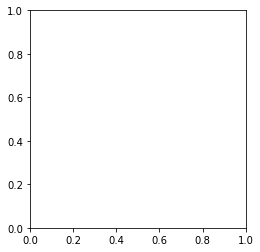

In [27]:
df_sorted.head(10).plot(x='CC',
               y='Vaccines_PCT', 
               kind='bar')

# This ^ is where I got stuck. I googled it and couldn't figure it out :(

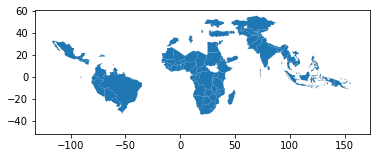

In [28]:
#This is just to give me a rough idea of what countries are represented in the dataset.

df.plot()

Predictably, Europe, the US, Canada and China aren't included.